# Simple Moving Averages Model For Rajasthan Toll Traffic Forecasting

# Importing dataset & libraries

In [275]:
import os
import pandas as pd
import numpy as np
import matplotlib    
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [276]:
Raj = pd.read_csv('Raj_Updated_2015 to 2022.csv', low_memory=False)

In [277]:
Raj.tail()

,Project Name,ClassName,PaymentCategory,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
356,BPPTL-TP04,Two wheelers,Towed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,BPPTL-TP04,Two wheelers,Violation,0,0,2,26,153,2,5,...,4,2,2,1,1,1,1,1,1,1
358,BPPTL-TP04,Unable to classify,Convoy,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
359,BPPTL-TP04,Unable to classify,Violation,0,0,122,170,3468,33,15,...,37,39,47,47,42,47,44,31,41,38
360,Grand Total,NaN,NaN,0,0,4937,4508,7025,4965,5034,...,6137,6318,6312,6170,6953,6003,6975,6850,7343,7255


In [278]:
Raj.describe()

,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,Jan16,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
count,361.0,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.0,0.0,106.911357,95.795014,109.487535,108.019391,109.512465,110.789474,112.520776,113.700831,...,130.864266,140.581717,140.584488,135.606648,145.872576,148.288089,155.479224,142.155125,161.498615,150.955679
std,0.0,0.0,497.052817,442.858533,539.830066,497.928160,505.687052,484.042526,504.236877,524.113038,...,649.735832,692.351360,694.040760,664.382454,727.861018,731.935289,764.994430,714.894431,796.190702,748.113326
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,5.000000,8.000000,11.000000,9.000000,10.000000,9.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,0.0,4937.000000,4508.000000,7025.000000,4965.000000,5034.000000,4567.000000,4943.000000,5218.000000,...,6137.000000,6318.000000,6312.000000,6170.000000,6953.000000,6003.000000,6975.000000,6850.000000,7343.000000,7255.000000


# Exploratory Data Analysis

In [279]:
#checking for Null Values

Raj.isnull().sum()

Project Name       0
ClassName          1
PaymentCategory    1
Apr15              0
May15              0
                  ..
Nov21              0
Dec21              0
Jan22              0
Feb22              0
March22            0
Length: 87, dtype: int64

In [280]:
#Dropping off 'PaymentCategory'

Raj = Raj.drop(labels=['PaymentCategory'], axis=1)

In [281]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,7,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,3,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,11,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,BPPTL-TP04,Two wheelers,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,BPPTL-TP04,Two wheelers,0,0,2,26,153,2,5,6,...,4,2,2,1,1,1,1,1,1,1
358,BPPTL-TP04,Unable to classify,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
359,BPPTL-TP04,Unable to classify,0,0,122,170,3468,33,15,18,...,37,39,47,47,42,47,44,31,41,38


In [282]:
#Removing insignificant vehicle types from the dataset
Raj = Raj[(Raj.ClassName != "Two wheelers") & (Raj.ClassName != "Three wheelers") & (Raj.ClassName != "Oversized") & 
          (Raj.ClassName != "Unable to classify") & (Raj.ClassName != "Tractor with Trailer") & 
          (Raj.ClassName != "Tractor without Trailer")]

In [283]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,7,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,3,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,11,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,BPPTL-TP04,Truck 2 axle,0,0,74,66,22,77,86,75,...,0,0,0,0,0,0,0,0,0,0
348,BPPTL-TP04,Truck 2 axle,0,0,279,253,89,309,308,271,...,904,998,1026,959,991,818,1032,1016,1132,1159
349,BPPTL-TP04,Truck 2 axle,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,BPPTL-TP04,Truck 2 axle,0,0,1,2,155,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
#Drop Month Apr, May & June(toll starts from July)

In [285]:
Raj.loc[:,'Apr15'] = 0

In [286]:
Raj.loc[:,'May15'] = 0

In [287]:
Raj.loc[:,'Jun15'] = 0

In [288]:
display(Raj)

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,1,1,0,1
1,BPPTL-TP01,3 Axle Vehicle,0,0,0,2,10,3,2,2,...,1,1,0,1,0,0,0,1,1,3
2,BPPTL-TP01,3 Axle Vehicle,0,0,0,9,9,16,15,16,...,0,0,0,0,0,0,0,0,0,0
3,BPPTL-TP01,3 Axle Vehicle,0,0,0,14,8,9,11,19,...,1,0,1,0,0,0,0,0,1,0
4,BPPTL-TP01,3 Axle Vehicle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,BPPTL-TP04,Truck 2 axle,0,0,0,66,22,77,86,75,...,0,0,0,0,0,0,0,0,0,0
348,BPPTL-TP04,Truck 2 axle,0,0,0,253,89,309,308,271,...,904,998,1026,959,991,818,1032,1016,1132,1159
349,BPPTL-TP04,Truck 2 axle,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,BPPTL-TP04,Truck 2 axle,0,0,0,2,155,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
Raj.tail()

,Project Name,ClassName,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
347,BPPTL-TP04,Truck 2 axle,0,0,0,66,22,77,86,75,...,0,0,0,0,0,0,0,0,0,0
348,BPPTL-TP04,Truck 2 axle,0,0,0,253,89,309,308,271,...,904,998,1026,959,991,818,1032,1016,1132,1159
349,BPPTL-TP04,Truck 2 axle,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,BPPTL-TP04,Truck 2 axle,0,0,0,2,155,1,0,0,...,0,0,0,0,0,0,0,0,0,0
360,Grand Total,NaN,0,0,0,4508,7025,4965,5034,4567,...,6137,6318,6312,6170,6953,6003,6975,6850,7343,7255


In [290]:
#Summation of indivisual traffic data points under the same classsName for removing data redundancy

Raj=Raj.groupby(["ClassName", "Project Name"], as_index=False)['Apr15', 'May15', 'Jun15', 'Jul15', 'Aug15', 'Sep15', 'Oct15','Nov15','Dec15','Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16','Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17','Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19','Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21','Jan22','Feb22','March22'
 ].sum()

In [291]:
Raj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 86 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ClassName     24 non-null     object
 1   Project Name  24 non-null     object
 2   Apr15         24 non-null     int64 
 3   May15         24 non-null     int64 
 4   Jun15         24 non-null     int64 
 5   Jul15         24 non-null     int64 
 6   Aug15         24 non-null     int64 
 7   Sep15         24 non-null     int64 
 8   Oct15         24 non-null     int64 
 9   Nov15         24 non-null     int64 
 10  Dec15         24 non-null     int64 
 11  Jan16         24 non-null     int64 
 12  Feb16         24 non-null     int64 
 13  Mar16         24 non-null     int64 
 14  Apr16         24 non-null     int64 
 15  May16         24 non-null     int64 
 16  Jun16         24 non-null     int64 
 17  Jul16         24 non-null     int64 
 18  Aug16         24 non-null     int64 
 19  Sep16     

In [292]:
Raj.head()

,ClassName,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,3 Axle Vehicle,BPPTL-TP01,0,0,0,663,653,703,775,664,...,481,464,463,485,528,436,538,477,517,488
1,3 Axle Vehicle,BPPTL-TP02,0,0,0,645,655,740,730,627,...,526,468,443,419,496,412,484,450,552,522
2,3 Axle Vehicle,BPPTL-TP03,0,0,0,1155,1211,1236,1301,1150,...,824,822,818,770,917,767,878,810,915,917
3,3 Axle Vehicle,BPPTL-TP04,0,0,0,1121,732,1228,1270,1139,...,812,812,803,767,920,765,877,814,914,915
4,Bus,BPPTL-TP01,0,0,0,174,174,179,185,202,...,158,258,298,373,335,389,361,277,357,341


In [293]:
Raj.describe()

,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,Jan16,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
count,24.0,24.0,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.0,0.0,0.0,1213.208333,1171.791667,1373.916667,1395.583333,1438.375000,1447.916667,1457.083333,...,1667.166667,1810.041667,1811.625000,1742.750000,1861.666667,1937.958333,2005.916667,1815.958333,2077.875000,1923.625000
std,0.0,0.0,0.0,1203.755788,1203.188950,1376.928116,1390.445719,1435.961814,1430.462009,1478.135809,...,1751.322722,1888.133849,1893.010871,1803.122636,1938.157903,2138.639785,2089.024318,1910.237169,2172.152075,1971.910744
min,0.0,0.0,0.0,174.000000,174.000000,179.000000,185.000000,202.000000,198.000000,192.000000,...,158.000000,257.000000,250.000000,251.000000,271.000000,246.000000,285.000000,249.000000,287.000000,293.000000
25%,0.0,0.0,0.0,304.000000,265.750000,334.250000,344.000000,371.500000,369.750000,358.500000,...,312.000000,369.250000,374.000000,379.750000,392.500000,430.000000,460.000000,371.750000,441.500000,427.500000
50%,0.0,0.0,0.0,534.000000,544.000000,575.500000,601.500000,549.000000,620.500000,618.500000,...,712.500000,717.000000,700.000000,675.000000,770.000000,654.000000,775.000000,724.500000,802.500000,794.000000
75%,0.0,0.0,0.0,2288.250000,1983.000000,2557.750000,2509.250000,3079.500000,2921.250000,2716.000000,...,3642.750000,3758.000000,3664.500000,3625.750000,4031.500000,3851.500000,4201.500000,3901.250000,4343.500000,4107.750000
max,0.0,0.0,0.0,3796.000000,4054.000000,4224.000000,4328.000000,3956.000000,4291.000000,4519.000000,...,4875.000000,5018.000000,5077.000000,4910.000000,5633.000000,6497.000000,5599.000000,5534.000000,5853.000000,5731.000000


In [294]:
display(Raj)

,ClassName,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
0,3 Axle Vehicle,BPPTL-TP01,0,0,0,663,653,703,775,664,...,481,464,463,485,528,436,538,477,517,488
1,3 Axle Vehicle,BPPTL-TP02,0,0,0,645,655,740,730,627,...,526,468,443,419,496,412,484,450,552,522
2,3 Axle Vehicle,BPPTL-TP03,0,0,0,1155,1211,1236,1301,1150,...,824,822,818,770,917,767,878,810,915,917
3,3 Axle Vehicle,BPPTL-TP04,0,0,0,1121,732,1228,1270,1139,...,812,812,803,767,920,765,877,814,914,915
4,Bus,BPPTL-TP01,0,0,0,174,174,179,185,202,...,158,258,298,373,335,389,361,277,357,341
5,Bus,BPPTL-TP02,0,0,0,265,265,273,276,294,...,212,344,354,370,379,436,433,359,425,429
6,Bus,BPPTL-TP03,0,0,0,317,307,343,344,401,...,254,408,426,427,448,534,511,418,478,467
7,Bus,BPPTL-TP04,0,0,0,260,176,298,289,349,...,249,372,376,382,397,493,469,376,447,423
8,CJV,BPPTL-TP01,0,0,0,1547,1515,1680,1691,2207,...,3189,3625,3615,3522,3381,4390,4025,3314,4078,3529
9,CJV,BPPTL-TP02,0,0,0,2281,2349,2515,2509,3129,...,3969,4367,4304,4232,4024,5198,4772,3947,5022,4232


In [295]:
#Month wise traffic data converted to Yearly summation of traffic for respective months

In [296]:
Raj['Jul-Dec-15'] = Raj.loc[0 : 350,['Apr15','May15','Jun15','Jul15','Aug15','Sep15','Oct15','Nov15','Dec15']].sum(axis = 1)

Raj['Jan-Dec-16'] = Raj.loc[0 : 350,['Jan16','Feb16','Mar16','Apr16','May16','Jun16','Jul16','Aug16','Sep16','Oct16','Nov16','Dec16']].sum(axis = 1)

Raj['Jan-Dec-17'] = Raj.loc[0 : 350,['Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17','Sep17','Oct17','Nov17','Dec17']].sum(axis = 1)

Raj['Jan-Dec-18'] = Raj.loc[0 : 350,['Jan18','Feb18','Mar18','Apr18','May18','Jun18','Jul18','Aug18','Sep18','Oct18','Nov18','Dec18']].sum(axis = 1)

In [297]:
Raj['Jan-Dec-19'] = Raj.loc[0 : 350,['Jan19','Feb19','Mar19','Apr19','May19','Jun19','Jul19','Aug19','Sep19','Oct19','Nov19','Dec19']].sum(axis = 1)
Raj['Jan-Dec-20'] = Raj.loc[0 : 350,['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20']].sum(axis = 1)
Raj['Jan-Dec-21'] = Raj.loc[0 : 350,['Jan21','Feb21','Mar21','Apr21','May21','Jun21','Jul21','Aug21','Sep21','Oct21','Nov21','Dec21']].sum(axis = 1)
Raj['Jan-Mar-22'] = Raj.loc[0 : 350,['Jan22','Feb22','March22']].sum(axis = 1)

In [298]:
print(Raj)

         ClassName Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  \
0   3 Axle Vehicle   BPPTL-TP01      0      0      0    663    653    703   
1   3 Axle Vehicle   BPPTL-TP02      0      0      0    645    655    740   
2   3 Axle Vehicle   BPPTL-TP03      0      0      0   1155   1211   1236   
3   3 Axle Vehicle   BPPTL-TP04      0      0      0   1121    732   1228   
4              Bus   BPPTL-TP01      0      0      0    174    174    179   
5              Bus   BPPTL-TP02      0      0      0    265    265    273   
6              Bus   BPPTL-TP03      0      0      0    317    307    343   
7              Bus   BPPTL-TP04      0      0      0    260    176    298   
8              CJV   BPPTL-TP01      0      0      0   1547   1515   1680   
9              CJV   BPPTL-TP02      0      0      0   2281   2349   2515   
10             CJV   BPPTL-TP03      0      0      0   2310   2397   2686   
11             CJV   BPPTL-TP04      0      0      0   2493   1861   3012   

In [299]:
Raj['ClassName']

0     3 Axle Vehicle
1     3 Axle Vehicle
2     3 Axle Vehicle
3     3 Axle Vehicle
4                Bus
5                Bus
6                Bus
7                Bus
8                CJV
9                CJV
10               CJV
11               CJV
12               LCV
13               LCV
14               LCV
15               LCV
16               MAV
17               MAV
18               MAV
19               MAV
20      Truck 2 axle
21      Truck 2 axle
22      Truck 2 axle
23      Truck 2 axle
Name: ClassName, dtype: object

In [300]:
Raj['Project Name']

0     BPPTL-TP01
1     BPPTL-TP02
2     BPPTL-TP03
3     BPPTL-TP04
4     BPPTL-TP01
5     BPPTL-TP02
6     BPPTL-TP03
7     BPPTL-TP04
8     BPPTL-TP01
9     BPPTL-TP02
10    BPPTL-TP03
11    BPPTL-TP04
12    BPPTL-TP01
13    BPPTL-TP02
14    BPPTL-TP03
15    BPPTL-TP04
16    BPPTL-TP01
17    BPPTL-TP02
18    BPPTL-TP03
19    BPPTL-TP04
20    BPPTL-TP01
21    BPPTL-TP02
22    BPPTL-TP03
23    BPPTL-TP04
Name: Project Name, dtype: object

In [301]:
display(Raj)

,ClassName,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,...,Feb22,March22,Jul-Dec-15,Jan-Dec-16,Jan-Dec-17,Jan-Dec-18,Jan-Dec-19,Jan-Dec-20,Jan-Dec-21,Jan-Mar-22
0,3 Axle Vehicle,BPPTL-TP01,0,0,0,663,653,703,775,664,...,517,488,4173,7600,7234,5905,5953,5917,6132,1482
1,3 Axle Vehicle,BPPTL-TP02,0,0,0,645,655,740,730,627,...,552,522,4094,7190,6865,6461,6537,6069,5928,1524
2,3 Axle Vehicle,BPPTL-TP03,0,0,0,1155,1211,1236,1301,1150,...,915,917,7310,13089,12315,11432,10743,10132,10414,2642
3,3 Axle Vehicle,BPPTL-TP04,0,0,0,1121,732,1228,1270,1139,...,914,915,6733,13140,12370,11343,10721,9964,10341,2643
4,Bus,BPPTL-TP01,0,0,0,174,174,179,185,202,...,357,341,1112,2390,2481,2744,3014,2946,3464,975
5,Bus,BPPTL-TP02,0,0,0,265,265,273,276,294,...,425,429,1663,3509,3799,4079,4396,3346,4232,1213
6,Bus,BPPTL-TP03,0,0,0,317,307,343,344,401,...,478,467,2078,4567,4907,5163,5609,4218,4989,1363
7,Bus,BPPTL-TP04,0,0,0,260,176,298,289,349,...,447,423,1690,3845,4187,4437,4869,3666,4497,1246
8,CJV,BPPTL-TP01,0,0,0,1547,1515,1680,1691,2207,...,4078,3529,10625,25511,28294,30151,34054,36492,41921,10921
9,CJV,BPPTL-TP02,0,0,0,2281,2349,2515,2509,3129,...,5022,4232,15738,38045,41870,45437,49366,47006,50580,13201


In [302]:
#Annualising Data
Raj['Jul-Dec-15']= 2*Raj['Jul-Dec-15']
Raj['Jan-Mar-22']= 4*Raj['Jan-Mar-22']

In [303]:
print(Raj)

         ClassName Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  \
0   3 Axle Vehicle   BPPTL-TP01      0      0      0    663    653    703   
1   3 Axle Vehicle   BPPTL-TP02      0      0      0    645    655    740   
2   3 Axle Vehicle   BPPTL-TP03      0      0      0   1155   1211   1236   
3   3 Axle Vehicle   BPPTL-TP04      0      0      0   1121    732   1228   
4              Bus   BPPTL-TP01      0      0      0    174    174    179   
5              Bus   BPPTL-TP02      0      0      0    265    265    273   
6              Bus   BPPTL-TP03      0      0      0    317    307    343   
7              Bus   BPPTL-TP04      0      0      0    260    176    298   
8              CJV   BPPTL-TP01      0      0      0   1547   1515   1680   
9              CJV   BPPTL-TP02      0      0      0   2281   2349   2515   
10             CJV   BPPTL-TP03      0      0      0   2310   2397   2686   
11             CJV   BPPTL-TP04      0      0      0   2493   1861   3012   

In [304]:
Raj.drop(index=23, axis=0, inplace=True)

In [305]:
print(Raj)

         ClassName Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  \
0   3 Axle Vehicle   BPPTL-TP01      0      0      0    663    653    703   
1   3 Axle Vehicle   BPPTL-TP02      0      0      0    645    655    740   
2   3 Axle Vehicle   BPPTL-TP03      0      0      0   1155   1211   1236   
3   3 Axle Vehicle   BPPTL-TP04      0      0      0   1121    732   1228   
4              Bus   BPPTL-TP01      0      0      0    174    174    179   
5              Bus   BPPTL-TP02      0      0      0    265    265    273   
6              Bus   BPPTL-TP03      0      0      0    317    307    343   
7              Bus   BPPTL-TP04      0      0      0    260    176    298   
8              CJV   BPPTL-TP01      0      0      0   1547   1515   1680   
9              CJV   BPPTL-TP02      0      0      0   2281   2349   2515   
10             CJV   BPPTL-TP03      0      0      0   2310   2397   2686   
11             CJV   BPPTL-TP04      0      0      0   2493   1861   3012   

In [306]:
#Toll wise summation
g_sum = Raj.groupby('Project Name', as_index=False).sum()
print(g_sum)

  Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  Nov15  Dec15  \
0   BPPTL-TP01      0      0      0   5684   5871   6376   6637   6692   6835   
1   BPPTL-TP02      0      0      0   6745   7112   7644   7815   7935   8158   
2   BPPTL-TP03      0      0      0   8375   8797   9382   9420   9769   9793   
3   BPPTL-TP04      0      0      0   7974   6065   9147   9181   9742   9508   

   ...  Feb22  March22  Jul-Dec-15  Jan-Dec-16  Jan-Dec-17  Jan-Dec-18  \
0  ...  10120     9366       76190       83396       89801       91077   
1  ...  11640    10617       90818      100572      109036      113749   
2  ...  13751    12856      111072      118642      125943      129590   
3  ...  13220    12159      103234      118184      125684      127269   

   Jan-Dec-19  Jan-Dec-20  Jan-Dec-21  Jan-Mar-22  
0       99372       98521      108467      113732  
1      122384      114846      122627      129388  
2      136956      130986      145651      154724  
3      134088  

In [307]:
g_sum = g_sum.drop(labels=['Jul-Dec-15', 'Jan-Dec-16', 'Jan-Dec-17',  'Jan-Dec-18','Jan-Dec-19','Jan-Dec-20','Jan-Dec-21', 'Jan-Mar-22' ], axis=1)

In [308]:
print(g_sum)

  Project Name  Apr15  May15  Jun15  Jul15  Aug15  Sep15  Oct15  Nov15  Dec15  \
0   BPPTL-TP01      0      0      0   5684   5871   6376   6637   6692   6835   
1   BPPTL-TP02      0      0      0   6745   7112   7644   7815   7935   8158   
2   BPPTL-TP03      0      0      0   8375   8797   9382   9420   9769   9793   
3   BPPTL-TP04      0      0      0   7974   6065   9147   9181   9742   9508   

   ...  Jun21  Jul21  Aug21  Sep21  Oct21  Nov21  Dec21  Jan22  Feb22  March22  
0  ...   8368   8894   8766   8675   9182   9325   9961   8947  10120     9366  
1  ...   9601  10069   9826   9718  10234  10576  11140  10090  11640    10617  
2  ...  10839  12062  12334  11615  12464  12921  13313  12074  13751    12856  
3  ...  10294  11411  11520  10850  11804  12861  12688  11448  13220    12159  

[4 rows x 85 columns]


In [309]:
# Get sum of all rows as a new row in Dataframe
total = g_sum.sum()
total.name = 'Total'
# Assign sum of all rows of DataFrame as a new Row
g_sum = g_sum.append(total.transpose())
print(g_sum)

                                   Project Name  Apr15  May15  Jun15  Jul15  \
0                                    BPPTL-TP01      0      0      0   5684   
1                                    BPPTL-TP02      0      0      0   6745   
2                                    BPPTL-TP03      0      0      0   8375   
3                                    BPPTL-TP04      0      0      0   7974   
Total  BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04      0      0      0  28778   

       Aug15  Sep15  Oct15  Nov15  Dec15  ...  Jun21  Jul21  Aug21  Sep21  \
0       5871   6376   6637   6692   6835  ...   8368   8894   8766   8675   
1       7112   7644   7815   7935   8158  ...   9601  10069   9826   9718   
2       8797   9382   9420   9769   9793  ...  10839  12062  12334  11615   
3       6065   9147   9181   9742   9508  ...  10294  11411  11520  10850   
Total  27845  32549  33053  34138  34294  ...  39102  42436  42446  40858   

       Oct21  Nov21  Dec21  Jan22  Feb22  March22  
0       91

In [310]:
i = g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')].index
i

Index(['Total'], dtype='object')

In [311]:
#Combining all 4 tolls under one category
Total_Traffic= g_sum[(g_sum['Project Name'] == 'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')]

In [312]:
Total_Traffic= pd.DataFrame(data= Total_Traffic)
Total_Traffic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Total to Total
Data columns (total 85 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Project Name  1 non-null      object
 1   Apr15         1 non-null      int64 
 2   May15         1 non-null      int64 
 3   Jun15         1 non-null      int64 
 4   Jul15         1 non-null      int64 
 5   Aug15         1 non-null      int64 
 6   Sep15         1 non-null      int64 
 7   Oct15         1 non-null      int64 
 8   Nov15         1 non-null      int64 
 9   Dec15         1 non-null      int64 
 10  Jan16         1 non-null      int64 
 11  Feb16         1 non-null      int64 
 12  Mar16         1 non-null      int64 
 13  Apr16         1 non-null      int64 
 14  May16         1 non-null      int64 
 15  Jun16         1 non-null      int64 
 16  Jul16         1 non-null      int64 
 17  Aug16         1 non-null      int64 
 18  Sep16         1 non-null      int64 
 19  Oct16    

In [313]:
Total_Traffic.head()

,Project Name,Apr15,May15,Jun15,Jul15,Aug15,Sep15,Oct15,Nov15,Dec15,...,Jun21,Jul21,Aug21,Sep21,Oct21,Nov21,Dec21,Jan22,Feb22,March22
Total,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,0,0,0,28778,27845,32549,33053,34138,34294,...,39102,42436,42446,40858,43684,45683,47102,42559,48731,44998


In [314]:
#Dropping insignificant months
Total_Traffic= Total_Traffic.drop(labels=['Apr15', 'May15', 'Jun15'], axis=1)

In [315]:
print(Total_Traffic)

                                   Project Name  Jul15  Aug15  Sep15  Oct15  \
Total  BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04  28778  27845  32549  33053   

       Nov15  Dec15  Jan16  Feb16  Mar16  ...  Jun21  Jul21  Aug21  Sep21  \
Total  34138  34294  34519  36180  34881  ...  39102  42436  42446  40858   

       Oct21  Nov21  Dec21  Jan22  Feb22  March22  
Total  43684  45683  47102  42559  48731    44998  

[1 rows x 82 columns]


In [316]:
#Calculate month wise total traffic from all 4 tolls combined under one column 'Month_year'

In [317]:
df_unpivoted = Total_Traffic.melt(id_vars=['Project Name'], value_name='BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04')

In [318]:
df_unpivoted= df_unpivoted.rename(columns = {"variable":"Month_year"})
df_unpivoted

,Project Name,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jul15,28778
1,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Aug15,27845
2,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Sep15,32549
3,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Oct15,33053
4,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov15,34138
...,...,...,...
76,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Nov21,45683
77,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Dec21,47102
78,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Jan22,42559
79,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04,Feb22,48731


In [319]:
#Month wise Totall Traffic
df_unpivoted.drop(['Project Name'], axis = 1)

,Month_year,BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04
0,Jul15,28778
1,Aug15,27845
2,Sep15,32549
3,Oct15,33053
4,Nov15,34138
...,...,...
76,Nov21,45683
77,Dec21,47102
78,Jan22,42559
79,Feb22,48731


In [320]:
#Month_year(format) column to Date column conversion

In [321]:
df = pd.DataFrame()

df['date'] = pd.date_range('7/1/2015', periods=81, freq='M')  
print(df)


         date
0  2015-07-31
1  2015-08-31
2  2015-09-30
3  2015-10-31
4  2015-11-30
..        ...
76 2021-11-30
77 2021-12-31
78 2022-01-31
79 2022-02-28
80 2022-03-31

[81 rows x 1 columns]


In [322]:
 df_unpivoted= pd.concat([df_unpivoted, df.reindex(df_unpivoted.index)], axis=1)


In [323]:
df1= df_unpivoted.drop(labels=['Project Name'], axis=1)
df1.rename(columns = {'BPPTL-TP01BPPTL-TP02BPPTL-TP03BPPTL-TP04':'Traffic'}, inplace = True)
df1

,Month_year,Traffic,date
0,Jul15,28778,2015-07-31
1,Aug15,27845,2015-08-31
2,Sep15,32549,2015-09-30
3,Oct15,33053,2015-10-31
4,Nov15,34138,2015-11-30
...,...,...,...
76,Nov21,45683,2021-11-30
77,Dec21,47102,2021-12-31
78,Jan22,42559,2022-01-31
79,Feb22,48731,2022-02-28


In [324]:
#Data in the from total 'Traffic' & respective 'Date'
df2= df1.drop(labels=['Month_year'], axis=1)

print(df2)

    Traffic       date
0     28778 2015-07-31
1     27845 2015-08-31
2     32549 2015-09-30
3     33053 2015-10-31
4     34138 2015-11-30
..      ...        ...
76    45683 2021-11-30
77    47102 2021-12-31
78    42559 2022-01-31
79    48731 2022-02-28
80    44998 2022-03-31

[81 rows x 2 columns]


In [325]:
#Date column in df3 converted to type Datetime & renamed as 'Month_year'


df2.date = pd.to_datetime(df2.date).dt.strftime('%m/%Y')
df2.rename(columns = {'date':'Month_year'}, inplace = True)

print (df2)

    Traffic Month_year
0     28778    07/2015
1     27845    08/2015
2     32549    09/2015
3     33053    10/2015
4     34138    11/2015
..      ...        ...
76    45683    11/2021
77    47102    12/2021
78    42559    01/2022
79    48731    02/2022
80    44998    03/2022

[81 rows x 2 columns]


In [326]:
#Totall Traffic converted to Average Total Traffic

In [327]:
df2['Traffic'] = df2['Traffic']/4
print (df2)

     Traffic Month_year
0    7194.50    07/2015
1    6961.25    08/2015
2    8137.25    09/2015
3    8263.25    10/2015
4    8534.50    11/2015
..       ...        ...
76  11420.75    11/2021
77  11775.50    12/2021
78  10639.75    01/2022
79  12182.75    02/2022
80  11249.50    03/2022

[81 rows x 2 columns]


In [328]:
#Average Toll Traffic calculated in a new data frame df3
df3 = df2[['Month_year', 'Traffic']]
df3

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50
...,...,...
76,11/2021,11420.75
77,12/2021,11775.50
78,01/2022,10639.75
79,02/2022,12182.75


In [329]:
df3.head()

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50


In [330]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  81 non-null     object 
 1   Traffic     81 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


# Stationary Test

In [331]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

In [332]:
#stationarity test(Dickey-Fuller Test)

from statsmodels.tsa.stattools import adfuller
ADF_result= adfuller(df3.Traffic)

print(f'ADF Statistics: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')      

ADF Statistics: -4.3017107443761455
p-value: 0.0004411919588175638


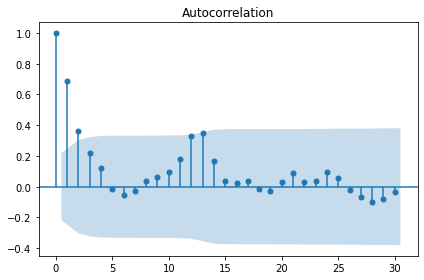

In [333]:
#ACF plot
plot_acf(df3.Traffic, lags=30);
plt.tight_layout()

# Moving Averages Process


In [334]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

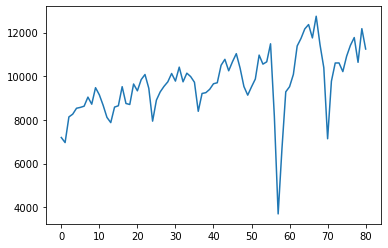

In [335]:
#Plotting Time Series
df3['Traffic'].plot()

# Data preparation for Time Series Modelling & Forecasting values

In [336]:
#Train-Test Split_1

In [337]:
#Training & Testing MA model(Train_data_1 : July'15-Feb'20, Test_data_1 : Mar'20-Aug'20)

Train1= df3.iloc[0:56]
Train1.head()

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50


In [338]:
Train1.tail()

,Month_year,Traffic
51,10/2019,9874.75
52,11/2019,10971.50
53,12/2019,10557.25
54,01/2020,10663.75
55,02/2020,11489.25


In [339]:
Train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  56 non-null     object 
 1   Traffic     56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [340]:
Test1= df3.loc[56:61]
Test1.head()

,Month_year,Traffic
56,03/2020,8166.75
57,04/2020,3691.25
58,05/2020,6678.75
59,06/2020,9286.50
60,07/2020,9522.75


In [341]:
Test1.tail()

,Month_year,Traffic
57,04/2020,3691.25
58,05/2020,6678.75
59,06/2020,9286.50
60,07/2020,9522.75
61,08/2020,10085.25


In [342]:
Test1['Traffic']= pd.Series(Test1['Traffic'])
Test1


,Month_year,Traffic
56,03/2020,8166.75
57,04/2020,3691.25
58,05/2020,6678.75
59,06/2020,9286.50
60,07/2020,9522.75
61,08/2020,10085.25


In [343]:
Test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 56 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  6 non-null      object 
 1   Traffic     6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes


In [344]:
#MA Model on Train Data_1
model_MA= ARMA(Train1['Traffic'], order= (0,2))
results_MA = model_MA.fit()
print(results_MA.summary())


                              ARMA Model Results                              
Dep. Variable:                Traffic   No. Observations:                   56
Model:                     ARMA(0, 2)   Log Likelihood                -441.373
Method:                       css-mle   S.D. of innovations            635.970
Date:                Fri, 01 Jul 2022   AIC                            890.745
Time:                        20:05:16   BIC                            898.847
Sample:                             0   HQIC                           893.886
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9410.7008    191.453     49.154      0.000    9035.460    9785.942
ma.L1.Traffic     0.8596      0.135      6.359      0.000       0.595       1.125
ma.L2.Traffic     0.4222      0.110     

In [345]:
#Predicting Traffic values for next 6 months
start_date= len(Train1)
end_date= len(Train1)+len(Test1)-1

pred= results_MA.predict(start= start_date, end= end_date)

In [346]:
#Printing Predictions
pred

56    10960.498544
57    10015.960048
58     9410.700820
59     9410.700820
60     9410.700820
61     9410.700820
dtype: float64

In [347]:
#RMSE for model evaluation using Test & Train Data

from sklearn.metrics import mean_squared_error
from math import sqrt
expected = Test1['Traffic']
predictions = pred
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3048.320326


In [348]:
#Plotting the forecasted values along with Train & Test 

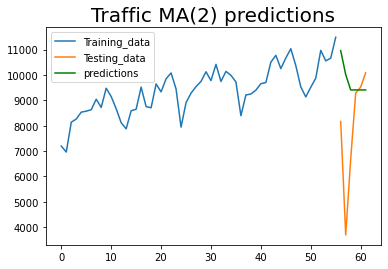

In [349]:
plt.title('Traffic MA(2) predictions', size=20)
plt.plot(Train1['Traffic'], label= 'Training_data')
plt.plot(Test1['Traffic'], label= 'Testing_data')
plt.plot(pred, color='green', label= 'predictions')
plt.legend();

In [350]:
#Train-Test Split_2

In [351]:
df3.head(48)

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50
5,12/2015,8573.50
6,01/2016,8629.75
7,02/2016,9045.00
8,03/2016,8720.25
9,04/2016,9477.25


In [352]:
#Training & Testing MA model(Train_data_2 : July'15-Oct'19, Test_data_2 : Nov'19-Apr'20)

Train2= df3.loc[0:51]
Train2.head()

,Month_year,Traffic
0,07/2015,7194.50
1,08/2015,6961.25
2,09/2015,8137.25
3,10/2015,8263.25
4,11/2015,8534.50


In [353]:
Train2.tail()

,Month_year,Traffic
47,06/2019,10371.50
48,07/2019,9531.75
49,08/2019,9135.25
50,09/2019,9517.00
51,10/2019,9874.75


In [354]:
Test2= df3.loc[52:55]
Test2.head()

,Month_year,Traffic
52,11/2019,10971.50
53,12/2019,10557.25
54,01/2020,10663.75
55,02/2020,11489.25


In [356]:
Test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 52 to 55
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  4 non-null      object 
 1   Traffic     4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 196.0+ bytes


In [357]:
Train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  52 non-null     object 
 1   Traffic     52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [358]:
Test2['Month_year']  =  pd.to_datetime(Test2['Month_year'])
Train2['Month_year'] =  pd.to_datetime(Train2['Month_year'])

In [359]:
Train2['Traffic']= Train2['Traffic'].squeeze()
Test2['Traffic']= Test2['Traffic'].squeeze()

In [360]:
Train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month_year  52 non-null     datetime64[ns]
 1   Traffic     52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 960.0 bytes


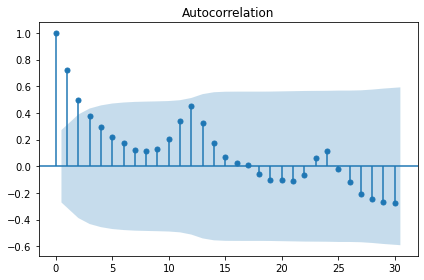

In [361]:
#ACF plot
plot_acf(Train2.Traffic, lags=30);
plt.tight_layout()

In [362]:
#Applying Simple Moving Averages Model on Train_2 & Test_2 data of order (0,2)

model_MA_2= ARMA(Train2['Traffic'], order= (0,2))
results_MA_2 = model_MA_2.fit()
print(results_MA_2.summary())

                              ARMA Model Results                              
Dep. Variable:                Traffic   No. Observations:                   52
Model:                     ARMA(0, 2)   Log Likelihood                -406.301
Method:                       css-mle   S.D. of innovations            594.285
Date:                Fri, 01 Jul 2022   AIC                            820.603
Time:                        20:05:18   BIC                            828.408
Sample:                             0   HQIC                           823.595
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9265.8133    179.092     51.738      0.000    8914.799    9616.828
ma.L1.Traffic     0.8046      0.134      6.026      0.000       0.543       1.066
ma.L2.Traffic     0.3985      0.104     

In [365]:
#Forecasting Traffic data values for next 6 months

index_future_dates=pd.date_range(start='2019-11',end='2020-03',freq='M')
start_date_2= len(Train2)
end_date_2= len(Train2)+len(Test2)-1

pred_2= results_MA_2.predict(start= start_date_2, end= end_date_2)
pred_2.index= index_future_dates
print(pred_2)

2019-11-30    9696.766007
2019-12-31    9413.671464
2020-01-31    9265.813323
2020-02-29    9265.813323
Freq: M, dtype: float64


In [94]:
#RMSE evaluation metric for model accuracy & performance

from sklearn.metrics import mean_squared_error
from math import sqrt
expected_1 = Test2['Traffic']
predictions_1 = pred_2
mse = mean_squared_error(expected_1, predictions_1)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1567.690677


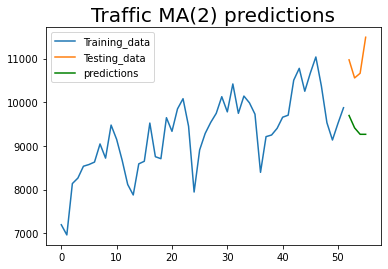

In [364]:
#Plotting forecasted Traffic values along with Train_2 & Test_2 data
plt.title('Traffic MA(2) predictions', size=20)
plt.plot(Train2['Traffic'], label= 'Training_data')
plt.plot(Test2['Traffic'], label= 'Testing_data')
plt.plot(pred_2, color='green', label= 'predictions')
plt.legend();